<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#modelo
from sklearn.cluster import KMeans


In [125]:
#dataset
my_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/noSupervisado/cust_seg.csv",index_col="Customer Id")

In [126]:
my_df.drop(columns=["Unnamed: 0"],inplace=True)

In [127]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [128]:
#missing values
my_df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [129]:
#Drop missings
#Not best solutions
my_df.dropna(inplace=True)


In [130]:
#Escalamos Dataset
scaler=StandardScaler()

#En no supervisado podemos hacer los dos pasos, si miedo del leakage
scaled_df=scaler.fit_transform(my_df)


In [131]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [132]:
#nueva columna de clusters
my_df["cluster"]=kmeans.labels_

In [133]:
my_df.head(4)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,3
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,3


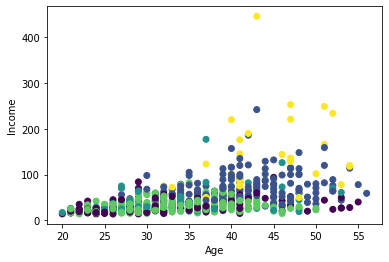

In [134]:
#visualizacion

plt.scatter(my_df['Age'],my_df['Income'],c=my_df["cluster"])
plt.xlabel("Age")
plt.ylabel("Income");

In [135]:
my_df.cluster.value_counts()

3    285
1    153
0    150
2     80
4     32
Name: cluster, dtype: int64

In [136]:
seg1=my_df[my_df["cluster"]==0]
seg2=my_df[my_df["cluster"]==1]
seg3=my_df[my_df["cluster"]==2]
seg4=my_df[my_df["cluster"]==3]
seg5=my_df[my_df["cluster"]==4]

In [142]:
cust_segs=[seg1,seg2,seg3,seg4,seg5]

for seg in cust_segs:
  print(seg.describe().T)


                 count       mean        std  ...      50%       75%     max
Age              150.0  31.753333   7.978105  ...  29.5000  36.00000  55.000
Edu              150.0   1.693333   0.759253  ...   2.0000   2.00000   4.000
Years Employed   150.0   4.013333   3.669184  ...   3.0000   6.00000  15.000
Income           150.0  30.360000  14.301302  ...  27.0000  38.50000  94.000
Card Debt        150.0   1.638233   1.463537  ...   1.2095   2.25000   6.912
Other Debt       150.0   2.829527   2.168891  ...   2.3585   3.80075  10.754
Defaulted        150.0   0.986667   0.115082  ...   1.0000   1.00000   1.000
DebtIncomeRatio  150.0  14.460667   7.286826  ...  13.8000  19.12500  35.300
cluster          150.0   0.000000   0.000000  ...   0.0000   0.00000   0.000

[9 rows x 8 columns]
                 count       mean        std  ...     50%     75%      max
Age              153.0  41.666667   5.922748  ...  41.000  46.000   56.000
Edu              153.0   1.477124   0.679444  ...   1.000 

In [148]:
#algunos promedios
age_means = [np.mean(seg["Age"]) for seg in cust_segs]
income_means = [np.mean(seg["Income"]) for seg in cust_segs]
cardDebt_means = [np.mean(seg["Card Debt"]) for seg in cust_segs]


In [149]:
#dataframe salida

summary_df=pd.DataFrame({"cust_segs":["seg1","seg2","seg3","seg4","seg5"],"Age Means":age_means,"Income Means":income_means,"Card Debt":cardDebt_means})
summary_df

,cust_segs,Age Means,Income Means,Card Debt
0,seg1,31.753333,30.360000,1.638233
1,seg2,41.666667,72.784314,2.091346
2,seg3,33.637500,42.000000,0.953987
3,seg4,32.256140,30.221053,0.665270
4,seg5,43.125000,133.062500,7.995750


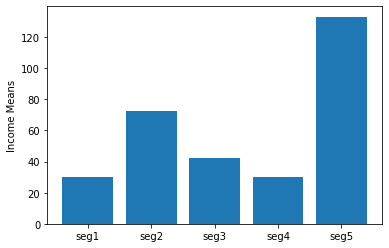

In [151]:
plt.bar(summary_df["cust_segs"],summary_df["Income Means"])
plt.ylabel("Income Means");